## NIFTY50 ANALYSIS: PREDICTING FUTURE TRENDS AND STRATEGIES
  
**Data source:** https://www.marketwatch.com/investing/index/nifty50/download-data?countrycode=in

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
plt.rcParams["figure.figsize"] = (15,5.5)
warnings.filterwarnings('ignore')

## Dataset

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close
0,03/10/2023,17443.80,17451.50,17324.35,17412.90
1,03/09/2023,17772.05,17772.35,17573.60,17589.60
2,03/08/2023,17665.75,17766.50,17602.25,17754.40
3,03/06/2023,17680.35,17799.95,17671.95,17711.45
4,03/03/2023,17451.25,17644.75,17427.70,17594.35


In [4]:
df.tail()

,Date,Open,High,Low,Close
3500,01/06/2009,3121.50,3112.80,3112.80,3121.50
3501,01/05/2009,3058.75,3121.45,3121.45,3058.75
3502,01/02/2009,3034.60,3046.75,3046.75,3034.60
3503,01/01/2009,2963.30,3033.45,3033.45,2963.30
3504,12/31/2008,2979.80,2959.15,2959.15,2979.80


## Data preparation

In [5]:
df.describe()

,Open,High,Low,Close
count,3505.000000,3505.000000,3505.000000,3505.000000
mean,9139.497375,9178.983010,9085.906377,9136.212611
std,4032.616854,4055.674395,3998.707580,4028.735582
min,2574.500000,2573.150000,2573.150000,2574.500000
25%,5693.050000,5718.900000,5662.750000,5693.050000
50%,8330.550000,8369.450000,8272.400000,8327.800000
75%,11248.900000,11302.200000,11142.050000,11222.400000
max,18871.950000,18887.600000,18778.200000,18812.500000


In [6]:
df = df.iloc[::-1]

In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Close
0,3504,12/31/2008,2979.80,2959.15,2959.15,2979.80
1,3503,01/01/2009,2963.30,3033.45,3033.45,2963.30
2,3502,01/02/2009,3034.60,3046.75,3046.75,3034.60
3,3501,01/05/2009,3058.75,3121.45,3121.45,3058.75
4,3500,01/06/2009,3121.50,3112.80,3112.80,3121.50


In [9]:
df.drop('index', axis=1, inplace=True)

In [10]:
df.head()

,Date,Open,High,Low,Close
0,12/31/2008,2979.80,2959.15,2959.15,2979.80
1,01/01/2009,2963.30,3033.45,3033.45,2963.30
2,01/02/2009,3034.60,3046.75,3046.75,3034.60
3,01/05/2009,3058.75,3121.45,3121.45,3058.75
4,01/06/2009,3121.50,3112.80,3112.80,3121.50


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3505 entries, 0 to 3504
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3505 non-null   object 
 1   Open    3505 non-null   float64
 2   High    3505 non-null   float64
 3   Low     3505 non-null   float64
 4   Close   3505 non-null   float64
dtypes: float64(4), object(1)
memory usage: 137.0+ KB


In [12]:
df.describe()

,Open,High,Low,Close
count,3505.000000,3505.000000,3505.000000,3505.000000
mean,9139.497375,9178.983010,9085.906377,9136.212611
std,4032.616854,4055.674395,3998.707580,4028.735582
min,2574.500000,2573.150000,2573.150000,2574.500000
25%,5693.050000,5718.900000,5662.750000,5693.050000
50%,8330.550000,8369.450000,8272.400000,8327.800000
75%,11248.900000,11302.200000,11142.050000,11222.400000
max,18871.950000,18887.600000,18778.200000,18812.500000


In [13]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [14]:
df.drop(['Date'], axis=1, inplace=True)

In [15]:
df.head()

,Open,High,Low,Close
0,2979.80,2959.15,2959.15,2979.80
1,2963.30,3033.45,3033.45,2963.30
2,3034.60,3046.75,3046.75,3034.60
3,3058.75,3121.45,3121.45,3058.75
4,3121.50,3112.80,3112.80,3121.50


## Exploratory Data Analysis (EDA)  



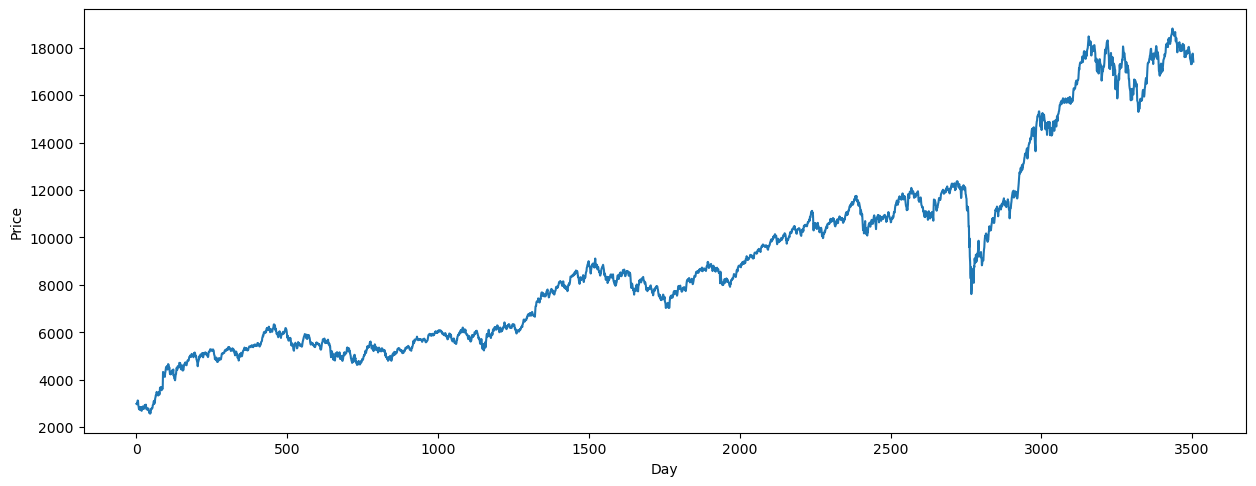

In [16]:
plt.plot(df.Close)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [17]:
mean_average_100 = df.Close.rolling(100).mean()
mean_average_100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3500    18012.0305
3501    18017.9090
3502    18025.3095
3503    18029.3485
3504    18030.3595
Name: Close, Length: 3505, dtype: float64

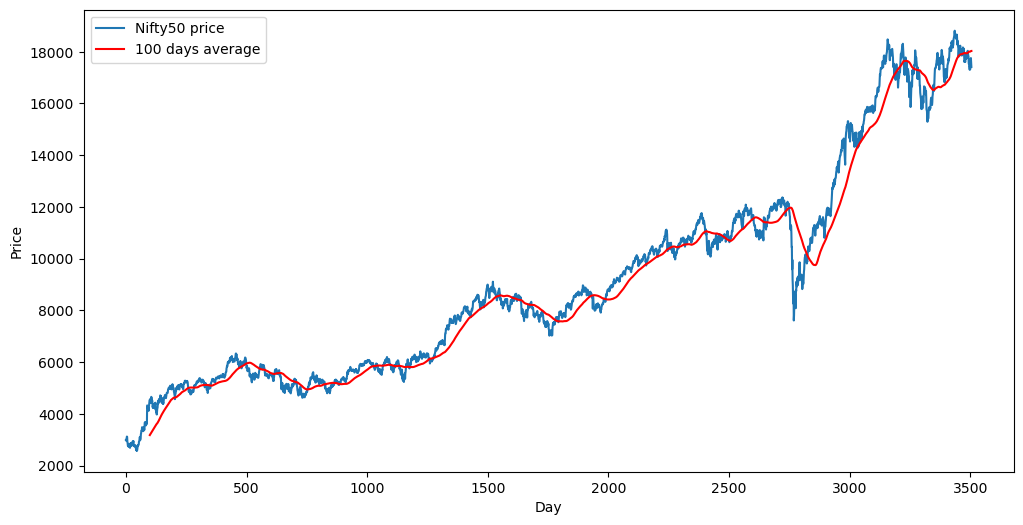

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label='Nifty50 price')
plt.plot(mean_average_100, 'r', label='100 days average')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

In [19]:
mean_average_200 = df.Close.rolling(200).mean()
mean_average_200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3500    17404.11550
3501    17413.62575
3502    17421.06700
3503    17427.94150
3504    17434.38025
Name: Close, Length: 3505, dtype: float64

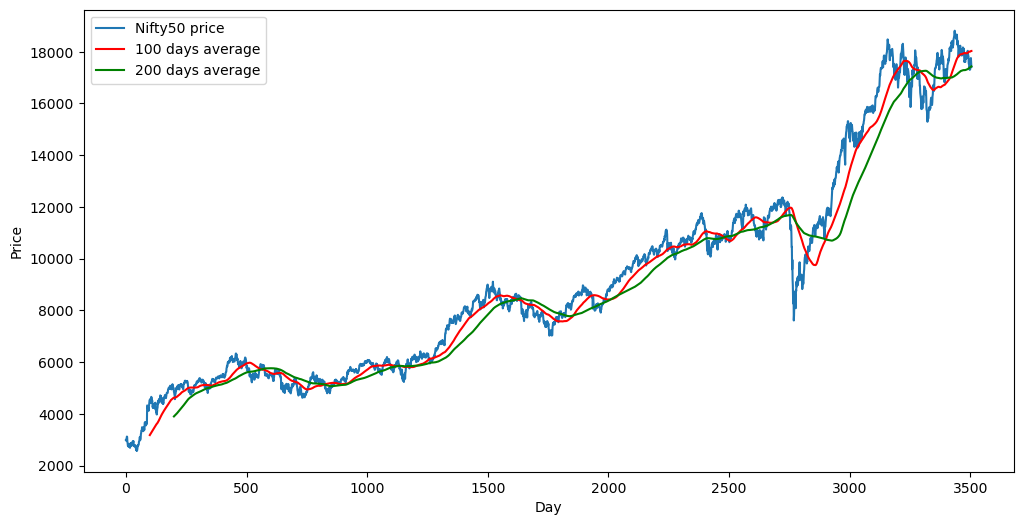

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close, label='Nifty50 price')
plt.plot(mean_average_100, 'r', label='100 days average')
plt.plot(mean_average_200, 'g', label='200 days average')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [21]:
df.shape

(3505, 4)

## Splitting data for training and testing (70/30)

In [22]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2453, 1)
(1052, 1)


In [23]:
data_training.head()

,Close
0,2979.80
1,2963.30
2,3034.60
3,3058.75
4,3121.50


In [24]:
data_testing.head()

,Close
2453,10591.00
2454,10810.75
2455,10784.50
2456,10853.20
2457,10850.90


In [25]:
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04416332],
       [0.0423654 ],
       [0.05013457],
       ...,
       [0.87937629],
       [0.86454622],
       [0.847259  ]])

In [27]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train

[array([[0.04416332],
        [0.0423654 ],
        [0.05013457],
        [0.05276606],
        [0.05960359],
        [0.0586556 ],
        [0.03764179],
        [0.0320737 ],
        [0.02184738],
        [0.01894893],
        [0.02809105],
        [0.01770673],
        [0.02769878],
        [0.02924607],
        [0.0221089 ],
        [0.01527682],
        [0.0142689 ],
        [0.01215499],
        [0.02142242],
        [0.0299489 ],
        [0.02719209],
        [0.03245508],
        [0.02168394],
        [0.02246848],
        [0.02487115],
        [0.02232138],
        [0.02926242],
        [0.03761455],
        [0.03906378],
        [0.03845358],
        [0.03513561],
        [0.04072549],
        [0.03043924],
        [0.01968444],
        [0.02203262],
        [0.02340558],
        [0.01773397],
        [0.01731991],
        [0.02045264],
        [0.0230133 ],
        [0.02071415],
        [0.01064038],
        [0.00408072],
        [0.00778007],
        [0.00024517],
        [0

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Building & Evaluating Machine learning Model

In [29]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model

In [30]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
74/74 [==============================] - 16s 137ms/step - loss: 0.0506
Epoch 2/50
74/74 [==============================] - 10s 140ms/step - loss: 0.0091
Epoch 3/50
74/74 [==============================] - 10s 140ms/step - loss: 0.0083
Epoch 4/50
74/74 [==============================] - 11s 142ms/step - loss: 0.0072
Epoch 5/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0069
Epoch 6/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0061
Epoch 7/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0064
Epoch 8/50
74/74 [==============================] - 10s 141ms/step - loss: 0.0059
Epoch 9/50
74/74 [==============================] - 11s 143ms/step - loss: 0.0049
Epoch 10/50
74/74 [==============================] - 11s 149ms/step - loss: 0.0050
Epoch 11/50
74/74 [==============================] - 11s 146ms/step - loss: 0.0045
Epoch 12/50
74/74 [==============================] - 11s 154ms/step - loss: 0.0051
Epoch 13/50
7

In [38]:
model.save('keras_model.h5')

## Prepare testing data

In [31]:
data_testing.head()

,Close
2453,10591.00
2454,10810.75
2455,10784.50
2456,10853.20
2457,10850.90


In [32]:
data_training.tail()

,Close
2448,10820.45
2449,10718.15
2450,10644.80
2451,10508.70
2452,10350.05


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [35]:
final_df.head()

,Close
0,11056.90
1,11018.95
2,10939.65
3,11060.20
4,10999.50


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.3076748 ],
       [0.30428709],
       [0.29720815],
       ...,
       [0.90554576],
       [0.89083443],
       [0.87506081]])

In [37]:
input_data.shape

(1152, 1)

In [38]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1052, 100, 1)
(1052,)


## Predict testing data

In [40]:
y_predicted = model.predict(x_test)

33/33 [==============================] - 2s 39ms/step


In [41]:
y_predicted.shape

(1052, 1)

In [42]:
y_test

array([0.26608494, 0.28570153, 0.28335825, ..., 0.90554576, 0.89083443,
       0.87506081])

In [43]:
y_predicted

array([[0.30529252],
       [0.30469283],
       [0.3031773 ],
       ...,
       [0.88506174],
       [0.8819911 ],
       [0.8797765 ]], dtype=float32)

In [44]:
scaler.scale_

array([8.9267781e-05])

In [45]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

## Plot original V/S predicted price

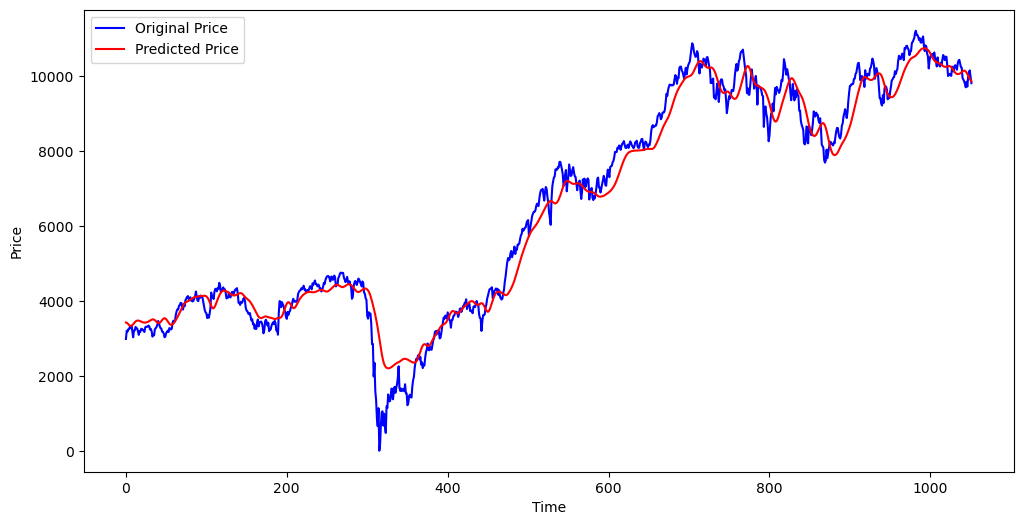

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()